# 차원축소 using LSA(Truncated SVD) => 설명력 높이기

In [1]:
# 필요한 라이브러리 import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD

## TruncatedSVD

In [7]:
# 데이터 불러오기
tfidf = pd.read_csv("../data/textvector/tfidf.csv")

In [8]:
tfidf

,patent_number,access,accordance,account,acquisition,action,activity,adherence,administration,agent,...,use,user,value,vector,vessel,video,view,volume,wireless,AAFC
0,10636516,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.148168,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1,9305140,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,5
2,10417446,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.339754,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,50
3,11170881,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.090718,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
4,10665334,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6827,10395334,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
6828,9792679,0.0,0.106578,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
6829,10799627,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
6830,11076812,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0


In [9]:
patent_num = tfidf['patent_number']
aafc = tfidf['AAFC']

tfidf = tfidf.drop(['patent_number', 'AAFC'], axis=1)

In [19]:
# 텍스트 벡터화
tfidf_vector = tfidf.to_numpy()

### FC 분포

In [10]:
%matplotlib inline 

In [11]:
aafc_list = aafc.tolist()

In [12]:
len(aafc_list)

6832

In [13]:
aafc_list.count(0)

4595

In [17]:
aafc.describe()

count    6832.000000
mean        2.194672
std        10.407135
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max       303.000000
Name: AAFC, dtype: float64

(array([6.746e+03, 5.900e+01, 1.300e+01, 3.000e+00, 3.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00]),
 array([  0. ,  30.3,  60.6,  90.9, 121.2, 151.5, 181.8, 212.1, 242.4,
        272.7, 303. ]),
 <BarContainer object of 10 artists>)

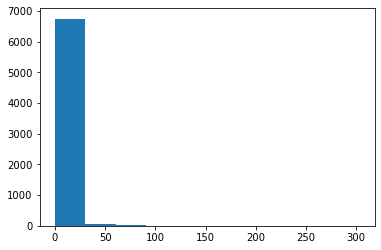

In [15]:
plt.hist(aafc)

<AxesSubplot:xlabel='AAFC', ylabel='Count'>

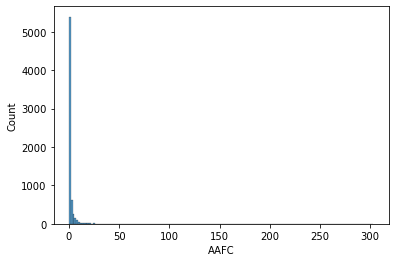

In [16]:
sns.histplot(aafc, bins=165)

### TFIDF

In [20]:
tfidf_vector.shape

(6832, 308)

In [ ]:
svd_t = TruncatedSVD(n_components=154, random_state=42)
svd_t.fit(tfidf_vector)

In [126]:
tfidf_transform = svd_t.transform(tfidf_vector)

In [127]:
svd_t.explained_variance_ratio_.sum()

0.7025603165680104

In [128]:
tfidf_transform.shape

(1562, 133)

## GTM

In [129]:
from ugtm import eGTM, ugtm_plot, ugtm_preprocess
import altair as alt

import matplotlib.pyplot as plt

In [130]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [155]:
pr_vect_tfidf = ugtm_preprocess.pcaPreprocess(tfidf_transform, doPCA=True, n_components=2)

Used 2 components explaining 2.06461113388078% of the variance



In [156]:
# GTM Mapping
gtm_tfidf = eGTM(model='modes').fit(tfidf_transform)
transformed_tfidf = gtm_tfidf.transform(tfidf_transform)

In [157]:
df_tfidf = pd.DataFrame(transformed_tfidf, columns=["x1", "x2"])

In [158]:
alt.Chart(df_tfidf).mark_point().encode(
x='x1',y='x2',
tooltip=["x1", "x2"]
).properties(title="GTM tfidf").interactive()

alt.Chart(...)

In [ ]:
df_tfidf.to_csv("../data/textvector/gtm_transformed_tfidf.csv", index = False)

## 역맵핑

In [166]:
inv_tfidf = np.linalg.pinv(tfidf_vector)
inner_tfidf = np.matmul(inv_tfidf, transformed_tfidf)
inv_inner_t = np.linalg.pinv(inner_tfidf)

In [167]:
tfidf_vacant = pd.read_csv("../data/textvector/tfidf_vacant.csv")

In [168]:
t_vacant_num = tfidf_vacant['Unnamed: 0']

In [169]:
tfidf_vacant = tfidf_vacant.drop(['Unnamed: 0'], axis=1)
tfidf_vacant_vec = tfidf_vacant.to_numpy()

In [170]:
inv_vacant_tfidf = np.matmul(tfidf_vacant_vec, inv_inner_t)

In [171]:
inv_vacant_tfidf_df = pd.DataFrame(inv_vacant_tfidf, columns=tfidf.columns)

In [172]:
inv_vacant_tfidf_df.insert(0, 'vacant_number', t_vacant_num)
inv_vacant_tfidf_df.to_csv("../data/textvector/inv_transformed_tfidf.csv", index = False)